## Chapter 1.6: Creating models from scratch
***
So far we have shown the basics to create geological models by importing data from an external source (in especial GeoModeller 3D). In this chapter, we will explore the option available in GemPy to create the data directly in GemPy or to modify existing one. In this respect we will delve into the pandas DataFrames that contain the necessary data.



In this example we will make use of the library qgrid. From its documentation :

> Qgrid is a Jupyter notebook widget which uses SlickGrid to render pandas DataFrames within a Jupyter notebook. This allows you to explore your DataFrames with intuitive scrolling, sorting, and filtering controls, as well as edit your DataFrames by double clicking cells.

In practice these library allows us to use `pandas.DataFrames` in Jupyter Notebooks as an excel table. Be aware that `Qgrid` requires of enabling nbextensions so it is important to test that the installation (https://github.com/quantopian/qgrid) was successful before trying to execute the rest of the notebook.

Let's create a bit of default data:

Let's start as always by importing the necessary dependencies:

In [1]:
# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

In [2]:
geo_model = gp.create_model('Tutorial_ch1-6_CreatingModels')
gp.init_data(geo_model, [0, 1000, 0, 1000, -1000, 0], [50, 50, 50])
geo_model.set_default_surfaces()
geo_model.set_default_orientation()
geo_model.add_surface_points(400, 300, -500, 'surface1')
geo_model.add_surface_points(600, 300, -500, 'surface1')


Active grids: ['regular']


,X,Y,Z,smooth,surface
0,400.0,300.0,-500.0,0.000001,surface1
1,600.0,300.0,-500.0,0.000001,surface1


Some default values but to make the model a bit faster but they are not necessary:

In [3]:
gp.set_interpolator(geo_model, theano_optimizer='fast_run',  verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1732.05
$C_o$            71428.6
drift equations      [3]


In [4]:
geo_model.additional_data

values
Structure isLith                                                        True
          isFault                                                      False
          number faults                                                    0
          number surfaces                                                  1
          number series                                                    1
          number surfaces per series                                     [1]
          len surfaces surface_points                                    [2]
          len series surface_points                                      [2]
          len series orientations                                        [1]
Options   dtype                                                      float64
          output                                                     geology
          theano_optimizer                                          fast_run
          device                                                         cpu
          verbosity                                                       []
Kriging   range                                                      1732.05
          $C_o$                                                      71428.6
          drift equations                                                [3]
Rescaling rescaling factor                                              1200
          centers                      [300.000005, 150.000005, -249.999995]

In [5]:
gp.compute_model(geo_model, debug=False,compute_mesh=False, sort_surfaces=False)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

i:\pycharmprojects\gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


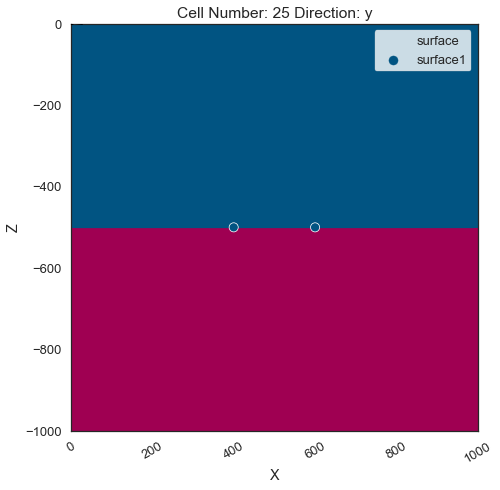

In [6]:
gp.plot_2d(geo_model, cell_number=25,
           direction='y', show_data=True)


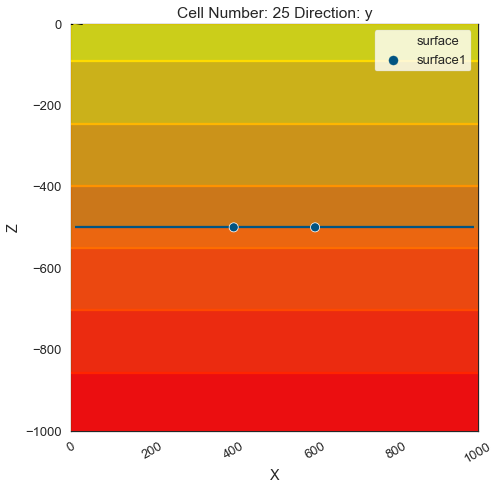

In [7]:
gp.plot_2d(geo_model, cell_number= 25, direction='y', series_n=0, show_scalar=True)

In [8]:
vtk_object = gp.plot_3d(geo_model, plotter_type='background')

In [9]:
vtk_object.toggle_live_updating()

True

In [10]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2


In [11]:
geo_model.modify_surface_points(0, Z=-300, plot_object=vtk_object)

,X,Y,Z,smooth,surface
0,400.0,300.0,-300.0,0.000001,surface1
1,600.0,300.0,-500.0,0.000001,surface1


In [12]:
geo_model.add_orientations(1,1,1, 'surface1', pole_vector=(1,1,1), plot_object=vtk_object)

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,0.00001,0.00001,0.00001,0.0,0.0,1.0,0.01,surface1
1,1.00000,1.00000,1.00000,1.0,1.0,1.0,0.01,surface1


## Passing the vtk object to qgrid

In [13]:
gp.activate_interactive_df(geo_model, vtk_object)

It is important to get df with get to update the models sinde the `activate_interactive` method is called

In [14]:
geo_model.qi.get('orientations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

i:\pycharmprojects\gempy\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: No surface found at the given iso value.. The surface is: Series: No surface found at the given iso value.; Surface Number:1
  '; Surface Number:' + str(s_n))


In [15]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

AssertionError: Model not computed. Laking data in some surface


Apply node that caused the error: Elemwise{sub,no_inplace}(Subtensor{::, int64:int64:}.0, Subtensor{::, int64:int64:}.0)
Toposort index: 111
Inputs types: [TensorType(float64, matrix), TensorType(float64, matrix)]
Inputs shapes: [(0, 0), (0, 1)]
Inputs strides: [(1000016, 8), (1000016, 8)]
Inputs values: [array([], shape=(0, 0), dtype=float64), array([], shape=(0, 1), dtype=float64)]
Inputs type_num: [12, 12]
Outputs clients: [[Elemwise{add,no_inplace}(Elemwise{sub,no_inplace}.0, TensorConstant{(1, 1) of 0.0001})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "i:\pycharmprojects\gempy\gempy\core\interpolator.py", line 1027, in compile_th_fn_geo
    self.theano_graph.theano_output(),
  File "i:\pycharmprojects\gempy\gempy\core\theano_modules\theano_graph_pro.py", line 558, in theano_output
    solutions[:9] = self.compute_series()
  File "i:\pycharmprojects\gempy\gempy\core\theano_modules\theano_graph_pro.py", line 432, in compute_seri

In [16]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [17]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [18]:
geo_model.qi.get('faults')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Fault colors changed. If you do not like this behavior, set change_color to False.


i:\pycharmprojects\gempy\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: No surface found at the given iso value.. The surface is: Series: No surface found at the given iso value.; Surface Number:0
  '; Surface Number:' + str(s_n))


Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


In [18]:
geo_model.qi.get('faults_relations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [19]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
series1,2,Fault,True,True,False


In [22]:
gp.compute_model(geo_model)


Lithology ids 
  [0. 0. 0. ... 0. 0. 0.] 

In [21]:
geo_model.surface_points

,X,Y,Z,smooth,surface
0,299.600201,772.615765,-552.816467,0.000001,surface1
1,582.115016,663.868433,-740.618860,0.000001,surface1
4,758.235692,11.568112,-629.601263,0.000001,surface1
5,473.917077,79.266347,-337.568765,0.000001,surface1
3,77.856401,473.182159,-240.869901,0.000001,surface2
2,484.397244,447.213061,-335.870346,0.000001,surface2


i:\pycharmprojects\gempy\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: No surface found at the given iso value.. The surface is: Series: No surface found at the given iso value.; Surface Number:0
  '; Surface Number:' + str(s_n))


## Finite Fault parameters

In [19]:
geo_model.interpolator.theano_graph.not_l.set_value(1.)
vtk_object.update_model()

../../..\gempy\core\solution.py:284: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


In [20]:
geo_model.interpolator.theano_graph.ellipse_factor_exponent.set_value(50)

In [21]:
vtk_object.update_model()